In [56]:
# read all text from file, split lines into list
words = open('names.txt', 'r').read().splitlines()

In [57]:
import torch

In [58]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [59]:
chars = sorted(list(set(''.join(words))))
# s => string of chars
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [60]:
b = {}
# for each word in words
for w in words:
    # Add start and end special char to words
    
    chs = ['.'] + list(w) + ['.']
    # create (c1, c2) of words
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

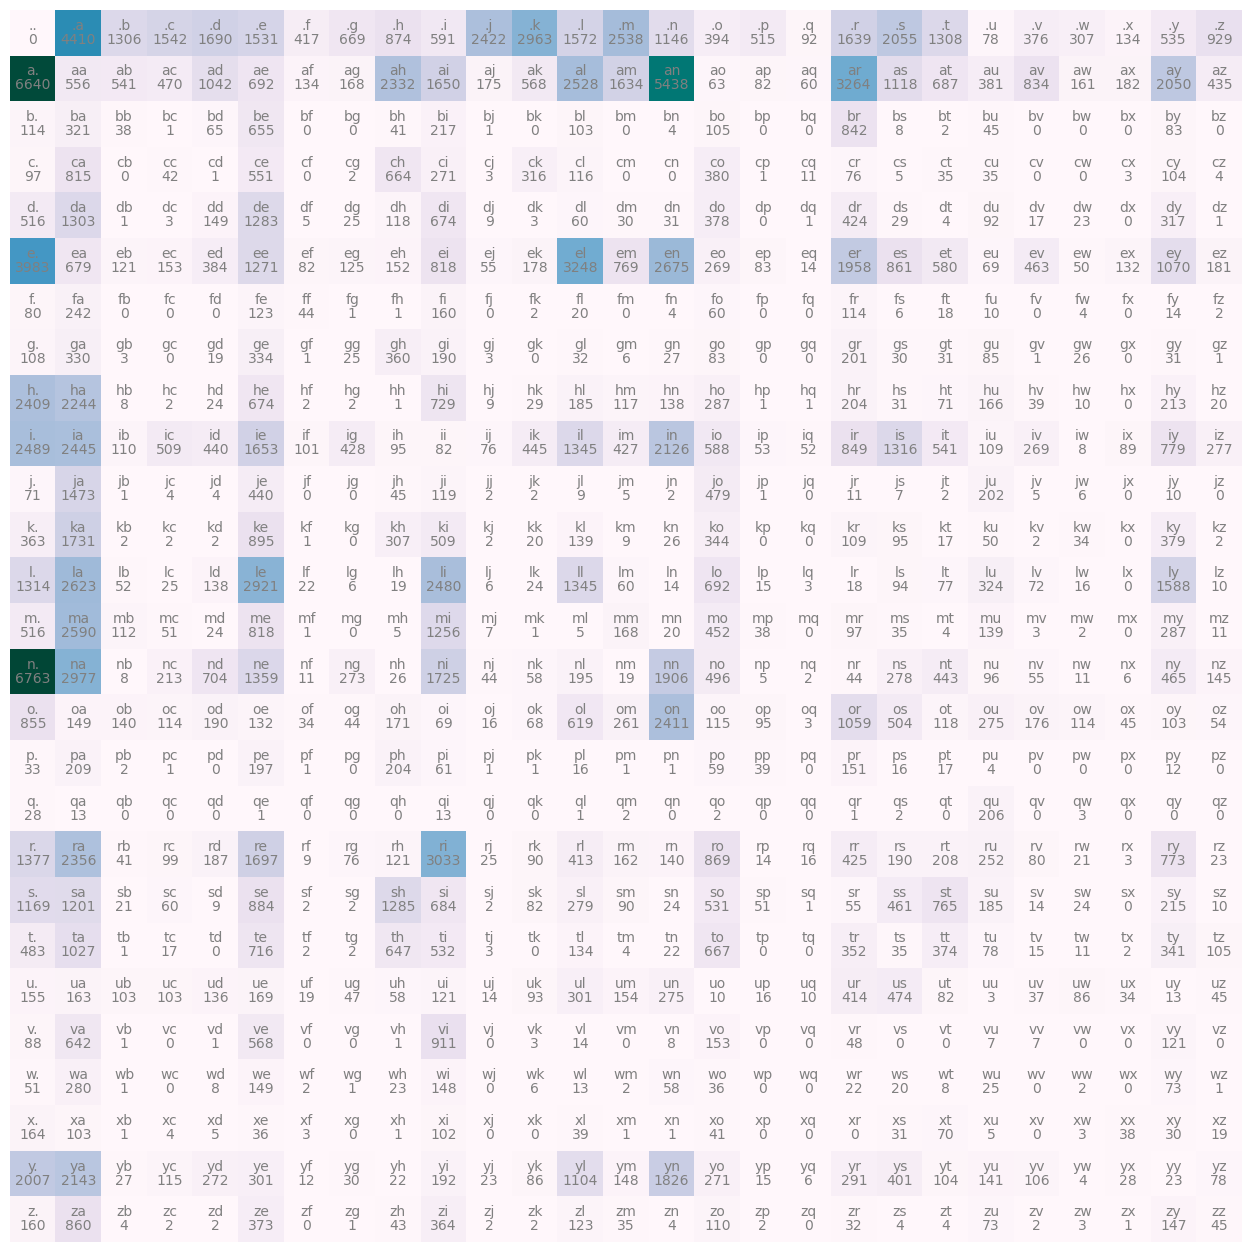

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='PuBuGn')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text (j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text (j, i, N[i, j].item(), ha='center', va='top', color='gray')

plt.axis('off')

In [104]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [106]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p /= p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        print(N[ix])
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

tensor([ 516, 2590,  112,   51,   24,  818,    1,    0,    5, 1256,    7,    1,
           5,  168,   20,  452,   38,    0,   97,   35,    4,  139,    3,    2,
           0,  287,   11], dtype=torch.int32)
tensor([ 855,  149,  140,  114,  190,  132,   34,   44,  171,   69,   16,   68,
         619,  261, 2411,  115,   95,    3, 1059,  504,  118,  275,  176,  114,
          45,  103,   54], dtype=torch.int32)
tensor([1377, 2356,   41,   99,  187, 1697,    9,   76,  121, 3033,   25,   90,
         413,  162,  140,  869,   14,   16,  425,  190,  208,  252,   80,   21,
           3,  773,   23], dtype=torch.int32)
tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)
mor.
tensor([6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
        2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
         18